# Fetch the repo

In [1]:
!git clone https://gitlab.com/sergeymirzoev/ot-stocker.git

fatal: destination path 'ot-stocker' already exists and is not an empty directory.


In [2]:
%cd ot-stocker/

/content/ot-stocker


In [3]:
!git pull origin OT-master

From https://gitlab.com/sergeymirzoev/ot-stocker
 * branch            OT-master  -> FETCH_HEAD
Already up to date.


# Deps and pandas issues

In [4]:
import sys
!{sys.executable} -m pip install --upgrade -r requirements.txt

     |████████████████████████████████| 9.9 MB 5.2 MB/s 
     |████████████████████████████████| 22.3 MB 38.1 MB/s 
     |████████████████████████████████| 61 kB 5.6 MB/s 
     |████████████████████████████████| 11.2 MB 38.6 MB/s 
     |████████████████████████████████| 6.4 MB 44.4 MB/s 
     |████████████████████████████████| 895 kB 52.5 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.64-py2.py3-none-any.whl size=24111 sha256=1bc0bc3bcfc02b32d8ecc709871e1b62ae69b12bc02dbeff1ad78d22b8b82076
  Stored in directory: /root/.cache/pip/wheels/86/fe/9b/a4d3d78796b699e37065e5b6c27b75cff448ddb8b24943c288
Successfully built yfinance
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
  Attempting uninstall: lxml
    Found exist

In [5]:
# Fix https://stackoverflow.com/questions/66916970/notebookformatter-object-has-no-attribute-get-result-error-when-querying-f

!pip uninstall -y numpy
!pip uninstall -y pandas

!pip install --user numpy
!pip install --user  pandas

Found existing installation: numpy 1.19.5
Uninstalling numpy-1.19.5:
  Successfully uninstalled numpy-1.19.5
Found existing installation: pandas 1.2.4
Uninstalling pandas-1.2.4:
  Successfully uninstalled pandas-1.2.4
     |████████████████████████████████| 15.7 MB 5.3 MB/s 
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yfinance 0.1.64 requires pandas>=0.24, which is not installed.
xarray 0.18.2 requires pandas>=1.0, which is not installed.
statsmodels 0.10.2 requires pandas>=0.19, which is not installed.
sklearn-pandas 1.8.0 requires pandas>=0.11.0, which is not installed.
seaborn 0.11.2 requires pandas>=0.23, which is not installed.
pymc3 3.11.4 requires pandas>=0.24.0, which is not installed.
plotnine 0.6.0 requires pandas>=0.25.0, which is n

     |████████████████████████████████| 11.3 MB 5.3 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.5 which is incompatible.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.25.0 which is incompatible.


# Base use scenario

This library provides us with a handy function called **tomorrow**. This function predicts the price of the "close" feature for tomorrow and let's dive deeper into it's parameters.

Arguments:

- *stock (str)*: stock ticker
- *features (list)*: ['Interest', 'Wiki_views', 'RSI', '%K', '%R']
- *steps (int)*: previous days to consider for generating the model.
- *training (float)*: fraction assigned for training the model
- *period (int)*: number of days considered for calculating indicators.
- *years (int or float)*: years of data to be considered
- *error_method (str)*: 'mape' or 'mse'
- *plot (bool)*: generate performance plot


The function returns result for the next business day. [price, error, date]


In [4]:
from stocker.predict import tomorrow
import stocker.get_data as dataloader

In [5]:
stock = 'GOOGL'

In [6]:
print(f"Company name is {dataloader.company_name(stock)}")

Company name is Alphabet Inc.


In [40]:
import datetime as dt

data = dataloader.total(stock, today=dt.datetime.today(), interest=True, wiki_views=True, indicators=True, progress=False)
data

Open         High  ...         %R        RSI
Date                                  ...                      
2021-02-17  2093.979980  2122.439941  ...  -7.718665  81.574050
2021-02-18  2105.000000  2121.989990  ... -11.447073  79.448684
2021-02-19  2107.790039  2118.580078  ... -18.742255  74.499245
2021-02-22  2053.600098  2080.330078  ... -38.061700  66.366363
2021-02-23  2013.989990  2072.500000  ... -54.883367  73.468924
...                 ...          ...  ...        ...        ...
2022-01-21  2651.870117  2697.310059  ... -98.383984  32.049158
2022-01-24  2519.560059  2624.060059  ... -71.325883  42.338411
2022-01-25  2574.800049  2587.979980  ... -87.824708  41.297244
2022-01-26  2622.379883  2660.000000  ... -74.207108  48.286714
2022-01-27  2626.080078  2653.050049  ... -75.449565  43.239466

[240 rows x 11 columns]

## Testing the stock price prediction with different parameters

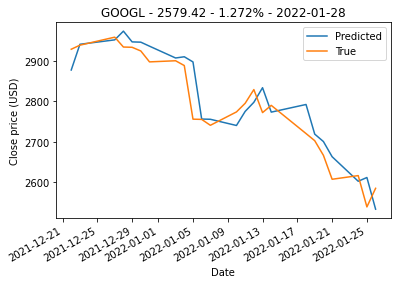

[2579.42, 1.272, '2022-01-28']

In [8]:
tomorrow(stock, today=dt.datetime.today() - dt.timedelta(days=1), years=1, plot=True)

In [9]:
import pandas as pd

df = pd.DataFrame(columns=["Close", "Predicted Close"])
df = df.assign(Close=dataloader.total(stock, today=dt.datetime.today(), interest=True, wiki_views=True, indicators=True, progress=False)["Close"])
df

Close Predicted Close
Date                                   
2021-02-17  2118.620117             NaN
2021-02-18  2105.810059             NaN
2021-02-19  2088.810059             NaN
2021-02-22  2054.260010             NaN
2021-02-23  2060.120117             NaN
...                 ...             ...
2022-01-21  2607.030029             NaN
2022-01-24  2616.080078             NaN
2022-01-25  2538.699951             NaN
2022-01-26  2584.659912             NaN
2022-01-27  2580.100098             NaN

[240 rows x 2 columns]

In [13]:
from tqdm.notebook import tqdm

start_date = dt.date(2021, 2, 17)
end_date = dt.date.today()

def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + dt.timedelta(n)

for date in tqdm(list(daterange(start_date, end_date))):
    df.loc[date.strftime("%Y-%m-%d"), "Predicted Close"] = tomorrow(stock, today=date - dt.timedelta(days=1), years=1)[0]

df

  0%|          | 0/345 [00:00<?, ?it/s]

Close Predicted Close
Date                                   
2021-02-17  2118.620117         2138.79
2021-02-18  2105.810059         2152.12
2021-02-19  2088.810059         2157.47
2021-02-22  2054.260010         2125.42
2021-02-23  2060.120117         2118.16
...                 ...             ...
2022-01-24  2616.080078         2587.54
2022-01-25  2538.699951         2602.44
2022-01-26  2584.659912         2590.18
2022-01-27  2580.100098         2532.63
2021-02-20          NaN         2144.52

[241 rows x 2 columns]

In [65]:
income = 0.
amount_of_traded_usd = 0.
trust_region_size = 0.04

In [66]:
for date in tqdm(list(daterange(start_date, end_date))):
    str_date = date.strftime("%Y-%m-%d")

    if str_date in data.index:
        df.loc[str_date, "Low"] = data.loc[str_date, "Low"]
        df.loc[str_date, "High"] = data.loc[str_date, "High"]
        if df.loc[str_date, "Low"] < df.loc[str_date, "Predicted Close"] * (1 - trust_region_size - 0.01):
            # if we are in this if, the buy limit order will be executed
            buy_price = df.loc[str_date, "Predicted Close"] * (1 - trust_region_size - 0.01)
            amount_of_traded_usd = max(buy_price, amount_of_traded_usd)

            if (df.loc[str_date, "High"] >= df.loc[str_date, "Predicted Close"] * (1 - trust_region_size)):
                income += df.loc[str_date, "Predicted Close"] * 0.01
            else:
                income += df.loc[str_date, "Close"] - buy_price
        

df = df.dropna()
df

  0%|          | 0/345 [00:00<?, ?it/s]

Close Predicted Close  ...         High  Possible To Long Trade
Date                                     ...                                     
2021-02-17  2118.620117         2138.79  ...  2122.439941                   False
2021-02-18  2105.810059         2152.12  ...  2121.989990                   False
2021-02-19  2088.810059         2157.47  ...  2118.580078                   False
2021-02-22  2054.260010         2125.42  ...  2080.330078                   False
2021-02-23  2060.120117         2118.16  ...  2072.500000                    True
...                 ...             ...  ...          ...                     ...
2022-01-21  2607.030029         2707.73  ...  2697.310059                   False
2022-01-24  2616.080078         2587.54  ...  2624.060059                   False
2022-01-25  2538.699951         2602.44  ...  2587.979980                   False
2022-01-26  2584.659912         2590.18  ...  2660.000000                   False
2022-01-27  2580.100098         2532.63  ...  2653.050049                   False

[240 rows x 6 columns]

In [68]:
income, amount_of_traded_usd

(328.5258, 2856.2795)

In [71]:
from math import ceil

f"We could earn {100 * income / amount_of_traded_usd:.2f}% with {stock} for a year range with {ceil(amount_of_traded_usd)}$ "

'We could earn 11.50% with GOOGL for a year range with 2857$ '

In [37]:
df["Fits"] = (df["Close"] < df["Predicted Close"] * (1 + trust_region_size)) & (df["Close"] > df["Predicted Close"] * (1 - trust_region_size))
df

Close Predicted Close  Fits
Date                                         
2021-02-17  2118.620117         2138.79  True
2021-02-18  2105.810059         2152.12  True
2021-02-19  2088.810059         2157.47  True
2021-02-22  2054.260010         2125.42  True
2021-02-23  2060.120117         2118.16  True
...                 ...             ...   ...
2022-01-21  2607.030029         2707.73  True
2022-01-24  2616.080078         2587.54  True
2022-01-25  2538.699951         2602.44  True
2022-01-26  2584.659912         2590.18  True
2022-01-27  2580.100098         2532.63  True

[240 rows x 3 columns]

In [54]:
df["Possible To Long Trade"] = (df["Low"] < df["Predicted Close"] * (1 - trust_region_size))
df

Close Predicted Close  ...         High  Possible To Long Trade
Date                                     ...                                     
2021-02-17  2118.620117         2138.79  ...  2122.439941                   False
2021-02-18  2105.810059         2152.12  ...  2121.989990                   False
2021-02-19  2088.810059         2157.47  ...  2118.580078                   False
2021-02-22  2054.260010         2125.42  ...  2080.330078                   False
2021-02-23  2060.120117         2118.16  ...  2072.500000                    True
...                 ...             ...  ...          ...                     ...
2022-01-21  2607.030029         2707.73  ...  2697.310059                   False
2022-01-24  2616.080078         2587.54  ...  2624.060059                   False
2022-01-25  2538.699951         2602.44  ...  2587.979980                   False
2022-01-26  2584.659912         2590.18  ...  2660.000000                   False
2022-01-27  2580.100098         2532.63  ...  2653.050049                   False

[240 rows x 6 columns]

In [55]:
df["Possible To Long Trade"].sum()

24

In [38]:
f"Hypothesis that actual close price is in ({1 - trust_region_size} pc, {(1 + trust_region_size)} pc) is {df['Fits'].sum() / df['Fits'].size}"

'Hypothesis that actual close price is in (0.96 pc, 1.04 pc) is 0.9333333333333333'

In [ ]:
error1 = tomorrow(stock, years=1)[1]
error2 = tomorrow(stock, years=2)[1]
error3 = tomorrow(stock, years=3)[1]
print('Error by using 1 year of data:',error1,'%')
print('Error by using 2 years of data:',error2,'%')
print('Error by using 3 years of data:',error3,'%')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Error by using 1 year of data: 1.346 %
Error by using 2 years of data: 1.2 %
Error by using 3 years of data: 1.211 %


In [ ]:
error1 = tomorrow(stock, steps=1)[1]
error2 = tomorrow(stock, steps=10)[1]
error3 = tomorrow(stock, steps=20)[1]
print('Error by using 1 previous day of data:',error1,'%')
print('Error by using 10 previous days of data:',error2,'%')
print('Error by using 20 previous days of data:',error3,'%')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Error by using 1 previous day of data: 1.261 %
Error by using 10 previous days of data: 2.564 %
Error by using 20 previous days of data: 4.364 %
